# First Part

**To improve a low contrast image, both local and global histogram equalization, as well as histogram specification, are used. All of these techniques try to boost an image's contrast. Histogram equalization converts the original image's distribution to a uniform distribution, whereas histogram specification converts a high contrast image's distribution to a low contrast image's. Local histogram equalization in a narrow neighborhood defined by window size can improve contrast in some circumstances.**


**For Histogram equalization, a  low contrast image of the surface of the moon was used. For histogram specification, a high contrast image of cameraman was used to enhance the contrast of a  low contrast image of the surface of the moon. Image of the Brain tumor MRI  was used for local histogram equalization.**

# Hisogram Equalization

I have followed the below steps for completing this task:

**Step-1:**Image to be used was loaded;

**Step-2:**Image was flattened to 1D and histogram was computed;

**Step-3:**Cumulative distribution of an image was computed;

**Step-4:**Inverse operation was used to assign values of cumulative distribution to the original image;


In [1]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from skimage import data

(<AxesSubplot:title={'center':'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

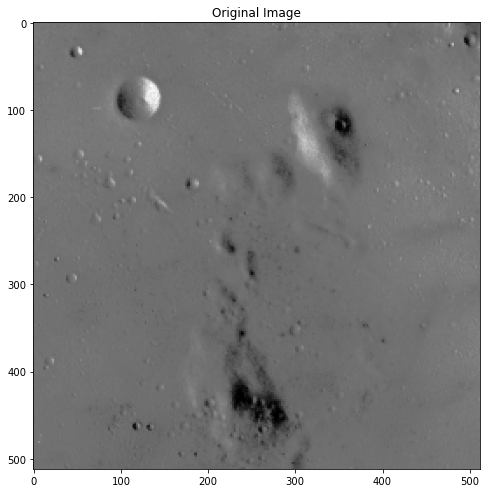

In [2]:
image=data.moon()
fig=plt.figure(figsize=(8,10))
fig.add_subplot(1,1,1),plt.imshow(image,cmap="gray"),plt.title("Original Image")

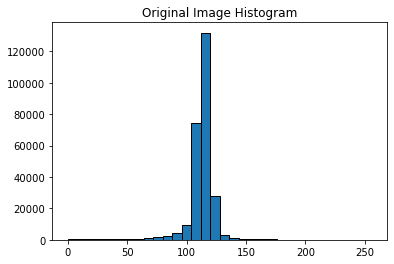

In [3]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.hist(image.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
plt.title('Original Image Histogram')
plt.show()

In [4]:
image1d=image.flatten()

In [7]:
def Histogram_Computation(image, bins):
    # array with size of bins, set to zeros
    Histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        Histogram[pixel] += 1
    
    # return our final result
    return Histogram

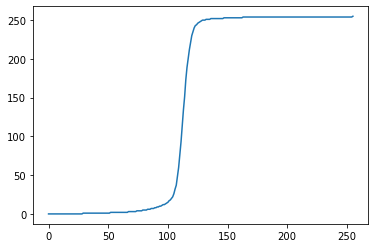

In [9]:
def compute_cdf(image_hist):
    img_cdf =np.cumsum(image_hist)
# Normalizing our CDF
    cdf_max=max(img_cdf)
    cdf_min=min(img_cdf)
    img_cdf=((img_cdf-cdf_min)/(cdf_max-cdf_min))*255
    img_cdf=img_cdf.astype('uint8')
    return img_cdf
img_hist=Histogram_Computation(image1d,256)
img_cdf= compute_cdf(img_hist)
plt.plot(img_cdf);

(<AxesSubplot:title={'center':'Image after Histogram Equailization'}>,
 Text(0.5, 1.0, 'Image after Histogram Equailization'))

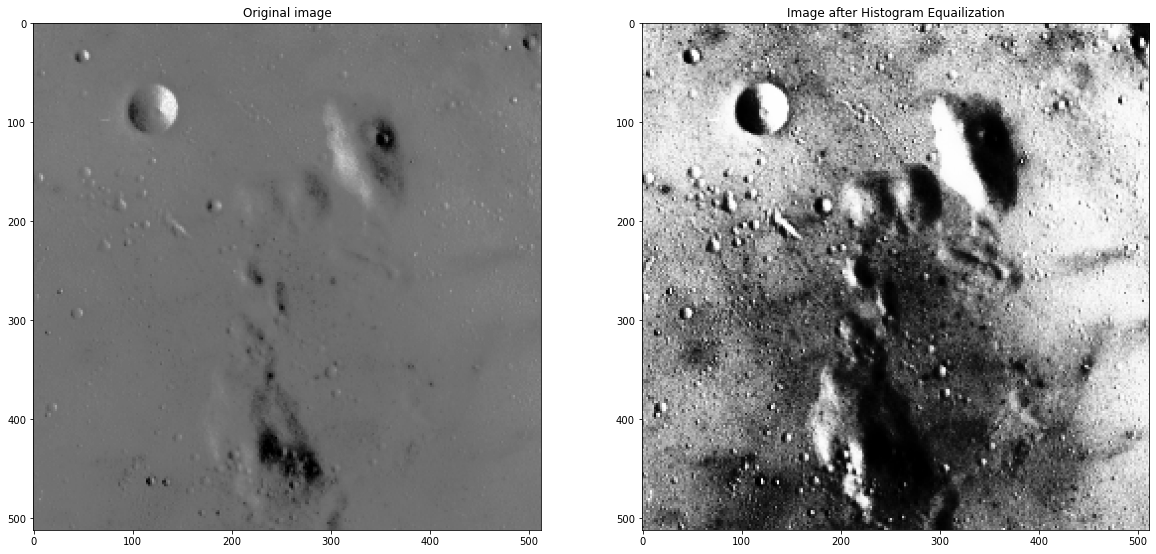

In [10]:
img_new=img_cdf[image1d]
img_new=np.reshape(img_new,image.shape)
fig=plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1),plt.imshow(image,cmap="gray"),plt.title("Original image")
fig.add_subplot(1,2,2),plt.imshow(img_new,cmap="gray"),plt.title("Image after Histogram Equailization")

<function matplotlib.pyplot.show(close=None, block=None)>

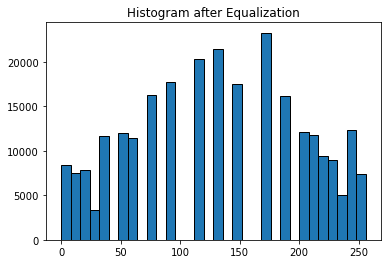

In [11]:
histogram = cv2.calcHist([img_new], [0], None, [256], [0, 256])
plt.hist(img_new.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
plt.title('Histogram after Equalization')
plt.show

# Histogram Specification

I have followed the below steps for completing this task:

**Step-1:**Image of interests were loaded;

**Step-2:**By following the same steps as in 1. Cumulative distribution of original and target image was computed;

**Step-3:**Cumulative distribution values of target image were assigned to those of original image;

**Step-4:**Inverse operation was used to obtain new pixel values of designed image;




In [12]:
Reference = data.moon()
Source = data.camera()

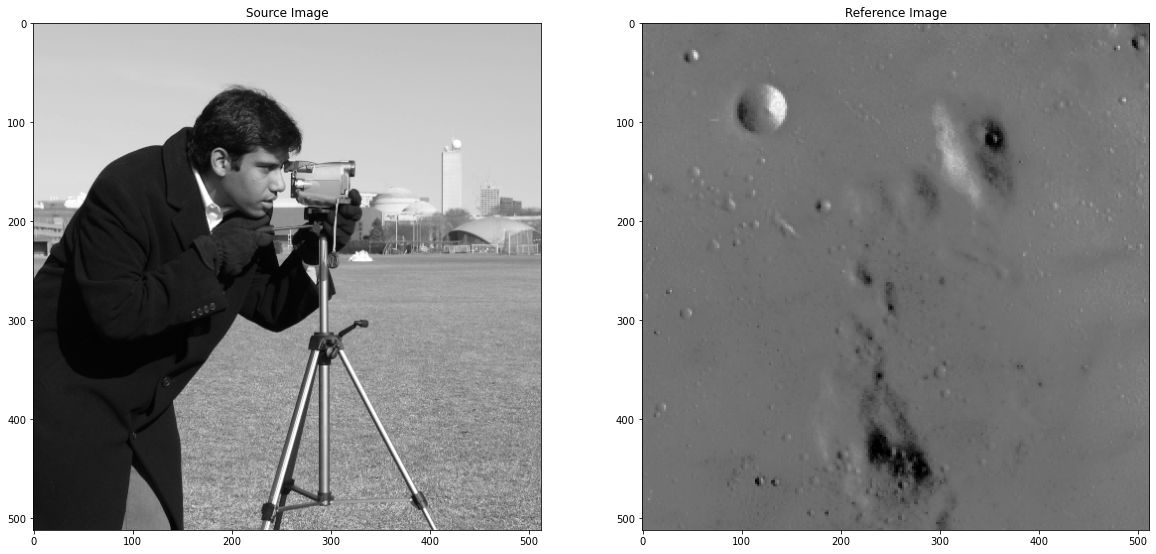

In [14]:
Reference=cv2.resize(Reference,(512,512))
Source=cv2.resize(Source,(512,512))
fig=plt.figure(figsize=(20,20))
fig.add_subplot(121)
plt.imshow(Source,cmap='gray'),plt.title("Source Image")
fig.add_subplot(122)
plt.imshow(Reference,cmap="gray"),plt.title("Reference Image");

In [15]:
Reference1d=Reference.flatten()
Source1d=Source.flatten()

In [16]:
# Computinh their Corresponding Histogram
Source_Histogram= Histogram_Computation(Source1d,256)
Reference_Histogram=Histogram_Computation(Reference1d,256)

# Computing their correspondin CDF
Source_CDF=compute_cdf(Source_Histogram)
Reference_CDF=compute_cdf(Reference_Histogram)


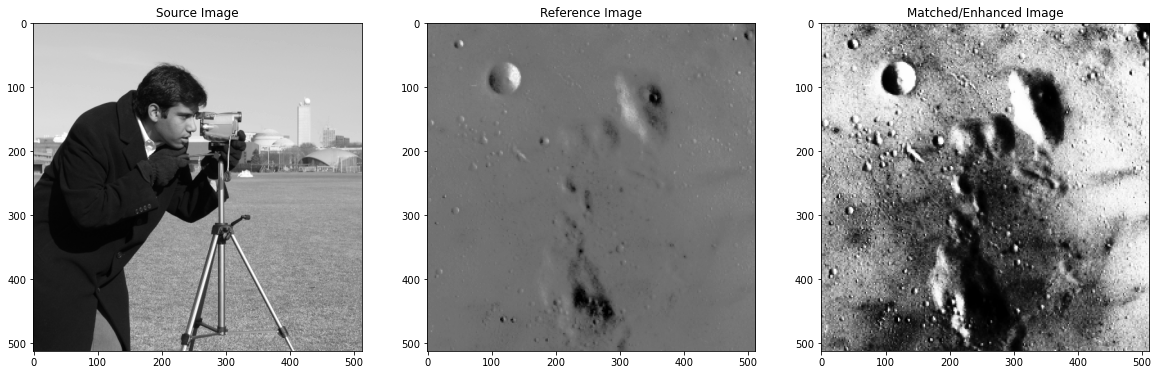

In [18]:
# Performing Histogram Matching
Source_CDF=Reference_CDF
# Assigning values from CDF of Reference to reference Flattened
Matched_Image=Reference_CDF[Reference1d]
Matched_Image=np.reshape(Matched_Image,Reference.shape)
Matched_Image_Histogram=Histogram_Computation(Matched_Image,256)
Matched_Image_CDF=compute_cdf(Matched_Image_Histogram)

fig=plt.figure(figsize=(20,20))
fig.add_subplot(131),plt.imshow(Source,cmap='gray'),plt.title("Source Image")
fig.add_subplot(132), plt.imshow(Reference,cmap="gray"),plt.title("Reference Image")
fig.add_subplot(133),plt.imshow(Matched_Image,cmap="gray"),plt.title("Matched/Enhanced Image");

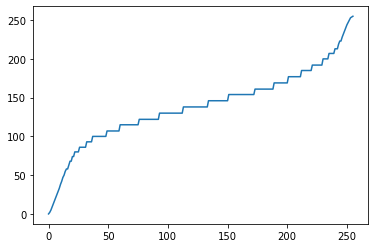

In [19]:
plt.plot(Matched_Image_CDF);

# Local Histogram Equalization

I have followed the below steps for completing this task:

**Step-1:**Image to be used was loaded;

**Step-2:**Square (width 30) and disk(radius=30) kernels were designed;

**Step-3:**Histogram equalization of the regions in original image specified by kernel size was computed;


In [20]:
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank

In [21]:
Test_Image=cv2.imread("Braintumor.jpg")
Test_Image=cv2.cvtColor(Test_Image,cv2.COLOR_RGB2GRAY)
Test_Image=cv2.resize(Test_Image,(512,512))

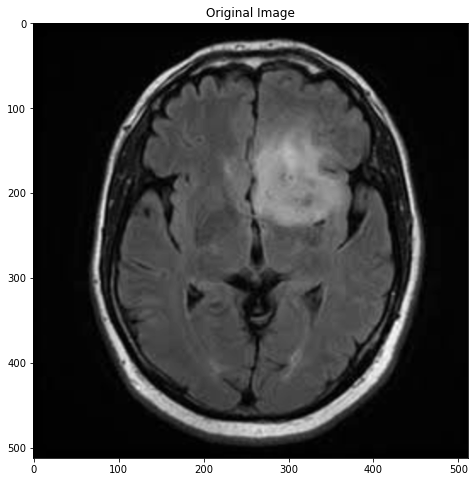

In [22]:
fig=plt.figure(figsize=(8,8))
fig.add_subplot(1,1,1),plt.imshow(Test_Image,cmap="gray"),plt.title("Original Image");

In [23]:
# Global equalize
Test_image_Global_Equalizaton = exposure.equalize_hist(Test_Image)

In [24]:
### Local Histogram equalization with both square and disk shape kernel
kernel_square30 = np.ones((30,30))
kernel_disk30=morp.disk(30)

In [25]:
Test_Image_Local_Histogram_Disk_Kernel= rank.equalize(Test_Image, selem=kernel_disk30)
Test_Image_Local_Histogram_Square_Kernel = rank.equalize(Test_Image, selem=kernel_square30)

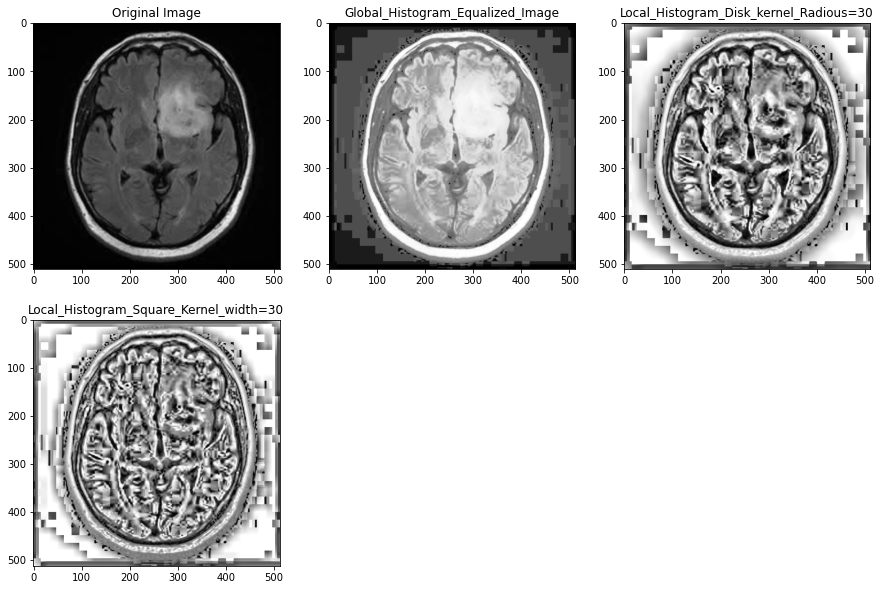

In [27]:
fig=plt.figure(figsize=(15,10))
fig.add_subplot(231), plt.imshow(Test_Image,cmap='gray'),plt.title("Original Image")
fig.add_subplot(232), plt.imshow(Test_image_Global_Equalizaton,cmap='gray'),plt.title("Global_Histogram_Equalized_Image")
fig.add_subplot(233), plt.imshow(Test_Image_Local_Histogram_Disk_Kernel,cmap="gray"),plt.title("Local_Histogram_Disk_kernel_Radious=30")
fig.add_subplot(234), plt.imshow(Test_Image_Local_Histogram_Square_Kernel,cmap='gray'),plt.title("Local_Histogram_Square_Kernel_width=30");

### Observations:

**Histogram equalization is a strong tool for improving image contrast by changing its distribution to a uniform distribution. Because the gay levels in my image are evenly spread, this method improved the contrast. Histogram specification is similar to histogram equalization in that it assigns a uniform distribution of a high contrast to a low contrast distribution. Histogram equalization and specification, on the other hand, are global strategies that may or may not work in all circumstances. The results in third task  indicate how by conducting equalization locally in the image, local histogram equalization surpassed the previous methods.**

# Second Part

**The Goal of this part is to implement mean filters to remove random noise and edges of objects in an image. Also, to design a median filter to sharpen an image by highlighting fine details in image and enhancing details that has been blurred. Median filter is very crucial for removing salt and pepper noise.**

I have followed below task for completing this task:

**Step-1:** Image to be used was loaded using open CV function imread();

**Step-2:** Creating of different size of kernels were performed;

**Step-3:** Then I have used cv2.filter2D function to convolve created kernel of size 3,5 and 7 over original image

**Step-4:** Open CV function medianblur() which takes image and kernel size as parameters was adopted to perform median filtering over our image. 


# Mean Filtering

In [28]:
astronaut_image= data.astronaut()

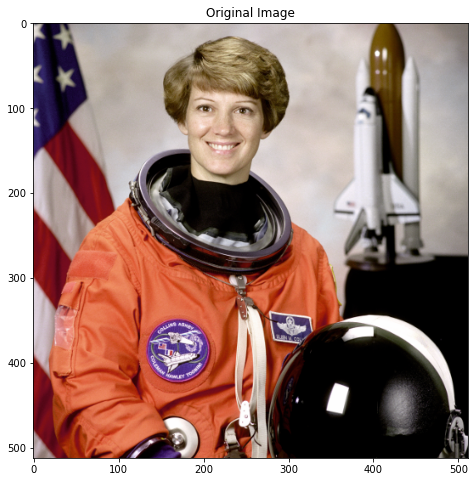

In [29]:
fig=plt.figure(figsize=(8,8))
fig.add_subplot(1,1,1),plt.imshow(astronaut_image,cmap="gray"),plt.title("Original Image");

In [30]:
# Creating 3 by 3 kernel
mean_3by3_kernel=np.ones((3,3),np.float32)/9

# Creating 5 by 5 kernel
mean_5by5_kernel=np.ones((5,5),np.float32)/25

# Creating 7 by 7 kernel
mean_7by7_kernel=np.ones((7,7),np.float32)/49

# Creating 9 by 9 kernel
mean_9by9_kernel=np.ones((9,9),np.float32)/81


In [31]:
# 3 by 3 dimension filter
astronaut_image_3by3=cv2.filter2D(astronaut_image,-1,mean_3by3_kernel)
# 5 by 5 dimesion filter
astronaut_image_5by5=cv2.filter2D(astronaut_image,-1,mean_5by5_kernel)
# 7 by 7 dimesion filter
astronaut_image_7by7=cv2.filter2D(astronaut_image,-1,mean_7by7_kernel)
# 9 by 9 dimesion filter
astronaut_image_9by9=cv2.filter2D(astronaut_image,-1,mean_9by9_kernel)



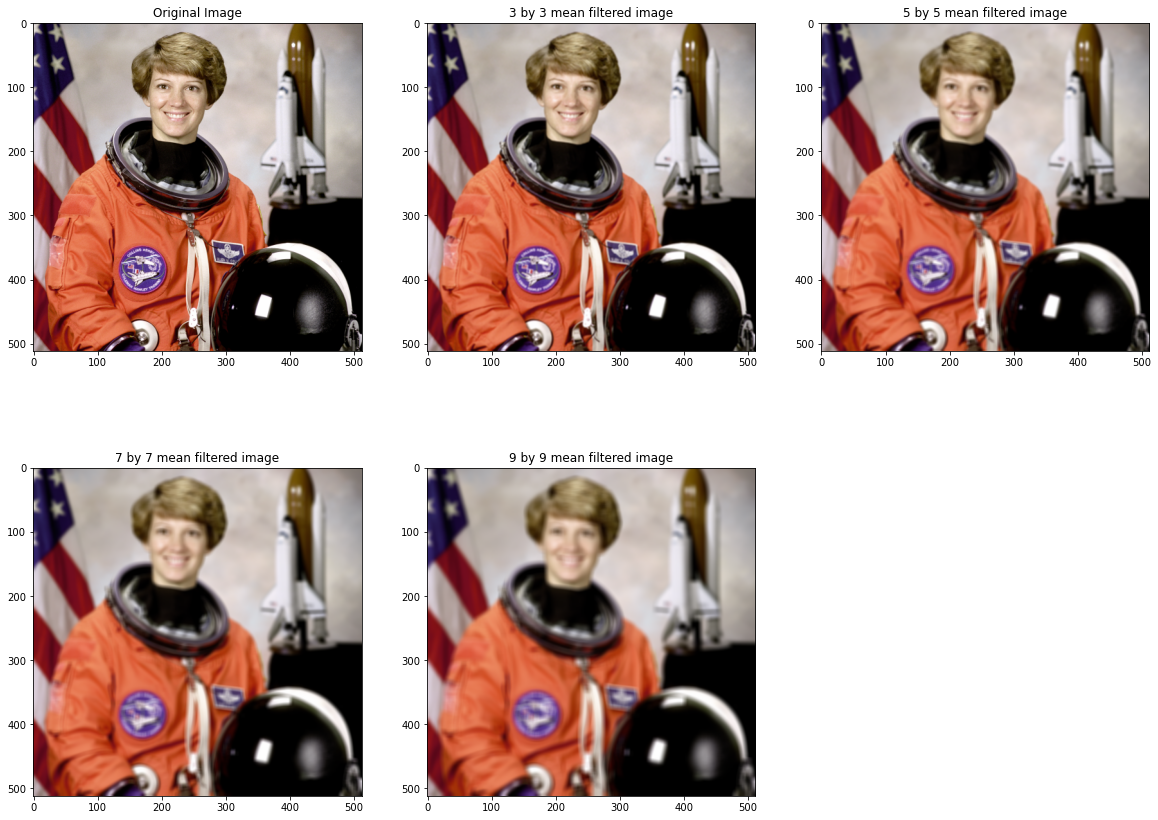

In [32]:
fig=plt.figure(figsize=(20,15))
fig.add_subplot(231), plt.imshow(astronaut_image,cmap='gray'),plt.title("Original Image")
fig.add_subplot(232), plt.imshow(astronaut_image_3by3,cmap='gray'),plt.title("3 by 3 mean filtered image")
fig.add_subplot(233), plt.imshow(astronaut_image_5by5,cmap="gray"),plt.title("5 by 5 mean filtered image")
fig.add_subplot(234), plt.imshow(astronaut_image_7by7,cmap='gray'),plt.title("7 by 7 mean filtered image")
fig.add_subplot(235), plt.imshow(astronaut_image_9by9,cmap='gray'),plt.title("9 by 9 mean filtered image");


# Median Filtering

In [33]:
Brain=cv2.imread("Brain.jpg")

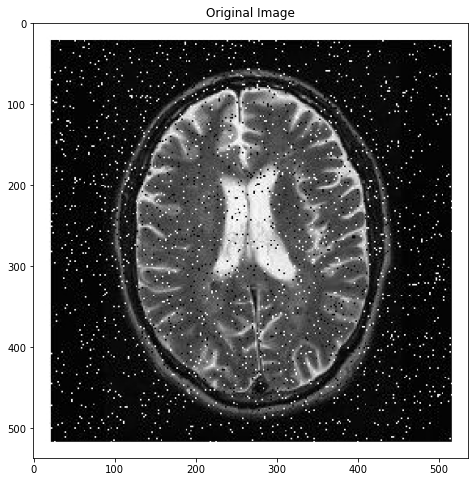

In [34]:
fig=plt.figure(figsize=(8,8))
fig.add_subplot(1,1,1),plt.imshow(Brain,cmap="gray"),plt.title("Original Image");

In [35]:
# Creatting Kernel for median filter
Brain_3by3=cv2.medianBlur(Brain,3)
Brain_5by5=cv2.medianBlur(Brain,5)
Brain_7by7=cv2.medianBlur(Brain,7)

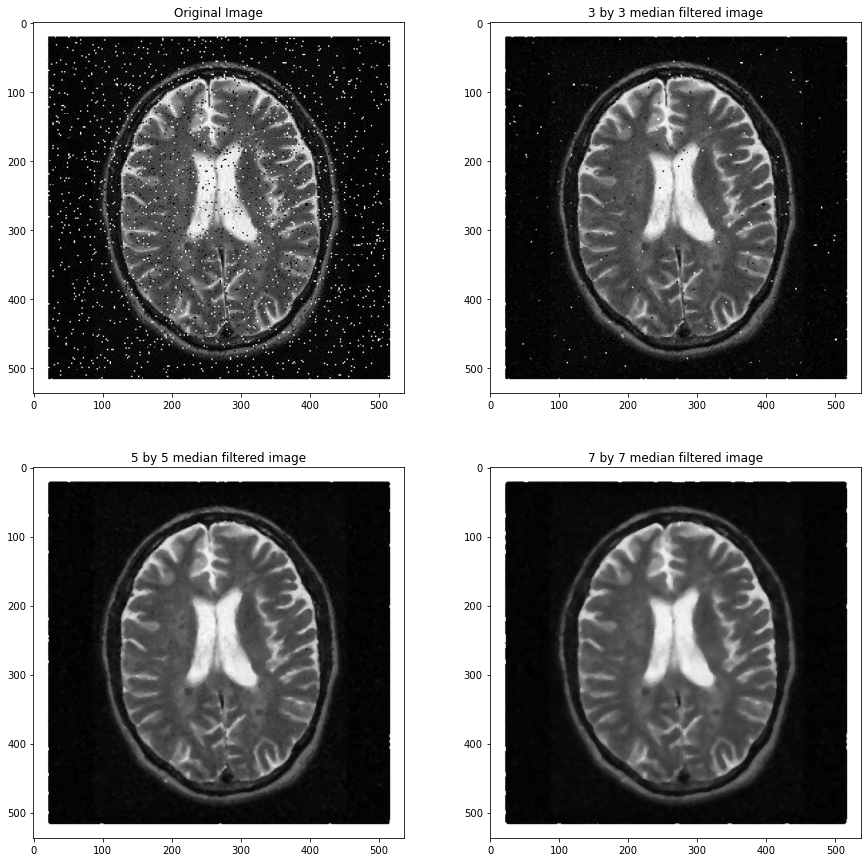

In [36]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(221), plt.imshow(Brain,cmap='gray'),plt.title("Original Image")
fig.add_subplot(222), plt.imshow(Brain_3by3,cmap='gray'),plt.title("3 by 3 median filtered image")
fig.add_subplot(223), plt.imshow(Brain_5by5,cmap="gray"),plt.title("5 by 5 median filtered image")
fig.add_subplot(224), plt.imshow(Brain_7by7,cmap='gray'),plt.title("7 by 7 median filtered image");

#### Observations:

**By applying average filter/low pass filter over the image, every pixel in an image by averaging of the gray levels in the neighborhood. My results original image being smoothen by mean filter but as we increase window size (ex: 7 by 7), the image became more blur.**

**The median filter performed better performance in terms of noise reduction compared to average  filtering and smoothed image became less blurry. However, like average filter very high window size made image blurrier.**


# Third Part

**The objective is to design a high pass filters (Laplacian) to enhance fine details in an image by highlighting gray-level discontinuities in an image and emphasizing regions with slowly varying gray levels.**

# High Pass Filter

I have followed below task for completing this part of the assignment:

**Step-1:** Image of interest was loaded to complte this task;

**Step-2:** Design 3 by 3, 5 by 5 and 7 by 7 high pass filters were performed;

**Step-3:** Convolve filter kernels over the image;

**Step-4:** Modifying masks by adding a constant number A>=1 to the center pixel create a high boost image to boost the image;

**Step-5:** Plot all images;


In [37]:
Hand=cv2.imread('Hand.png')

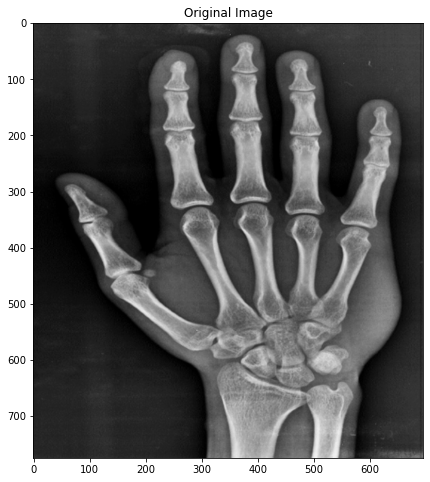

In [38]:
fig=plt.figure(figsize=(8,8))
fig.add_subplot(1,1,1),plt.imshow(Hand,cmap="gray"),plt.title("Original Image");

In [39]:
# Creating 3by3 high pass filter kernel
kernel_3by3=np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])

# Creating 5by5 high pass filter kernel
kernel_5by5=np.array([[-1, -1, -1, -1, -1],
                      [-1,  1,  2,  1, -1],
                      [-1,  2,  4,  2, -1],
                      [-1,  1,  2,  1, -1],
                      [-1, -1, -1, -1, -1]])


# Creating 7by7 high pass filter kernel
kernel_7by7= np.array([[1,0,0,1,0,0,1],
                    [0,2,0,2,0,2,0],
                    [0,0,4,4,4,0,0],
                    [1,2,4,-56,4,2,1],
                    [0,0,4,4,4,0,0],
                    [0,2,0,2,0,2,0],
                    [1,0,0,1,0,0,1]])


In [40]:
# Designing 3by3 high pass filter
Hand_3by3=cv2.filter2D(Hand,-1,kernel_3by3)

# Designing 5by5 high pass filter
Hand_5by5=cv2.filter2D(Hand,-1,kernel_5by5)

# Designing 7by7 high pass filter
Hand_7by7=cv2.filter2D(Hand,-1,kernel_7by7)

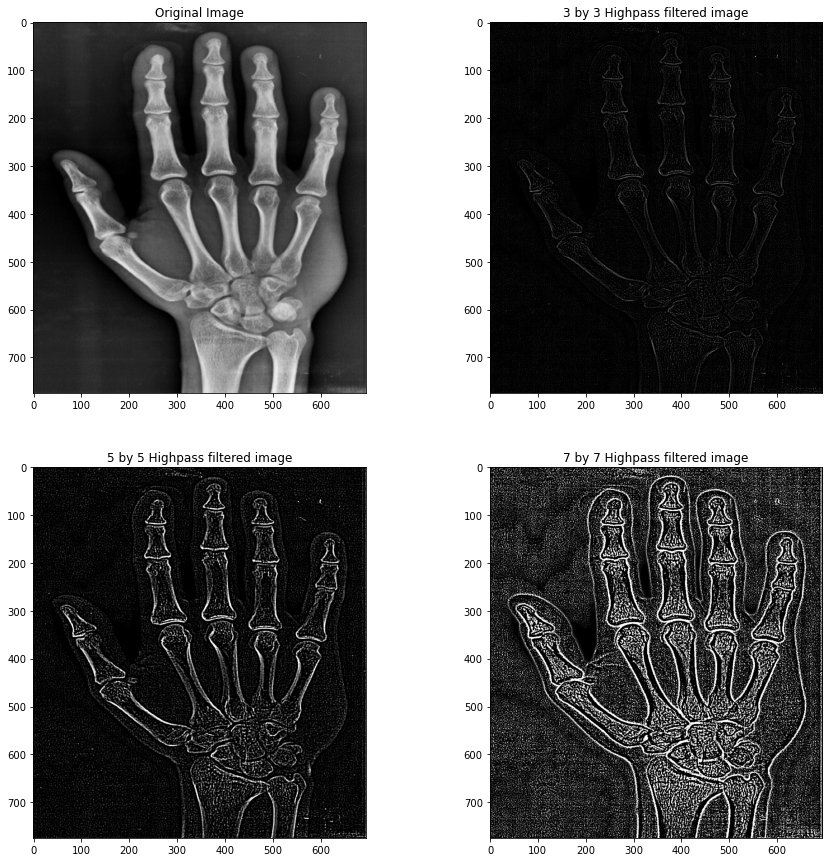

In [41]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(221), plt.imshow(Hand,cmap="gray"),plt.title("Original Image")
fig.add_subplot(222), plt.imshow(Hand_3by3,cmap="gray"),plt.title("3 by 3 Highpass filtered image")
fig.add_subplot(223), plt.imshow(Hand_5by5,cmap="gray"),plt.title("5 by 5 Highpass filtered image")
fig.add_subplot(224), plt.imshow(Hand_7by7,cmap='gray'),plt.title("7 by 7 Highpass filtered image");


# High_Boost Filtering

In [42]:
# Adding 2 into the central elelement to boost of filtering technique

# Creating 3by3 high pass filter kernel
kernel_3by3=np.array([[-1,-1,-1],
                       [-1,10,-1],
                       [-1,-1,-1]])

# Creating 5by5 high pass filter kernel
kernel_5by5=np.array([[-1, -1, -1, -1, -1],
                      [-1,  1,  2,  1, -1],
                      [-1,  2,  6,  2, -1],
                      [-1,  1,  2,  1, -1],
                      [-1, -1, -1, -1, -1]])


# Creating 7by7 high pass filter kernel
kernel_7by7= np.array([[1,0,0,1,0,0,1],
                    [0,2,0,2,0,2,0],
                    [0,0,4,4,4,0,0],
                    [1,2,4,-54,4,2,1],
                    [0,0,4,4,4,0,0],
                    [0,2,0,2,0,2,0],
                    [1,0,0,1,0,0,1]])

In [43]:
# Designing 3by3 high pass filter
Hand_3by3=cv2.filter2D(Hand,-1,kernel_3by3)

# Designing 5by5 high pass filter
Hand_5by5=cv2.filter2D(Hand,-1,kernel_5by5)

# Designing 7by7 high pass filter
Hand_7by7=cv2.filter2D(Hand,-1,kernel_7by7)

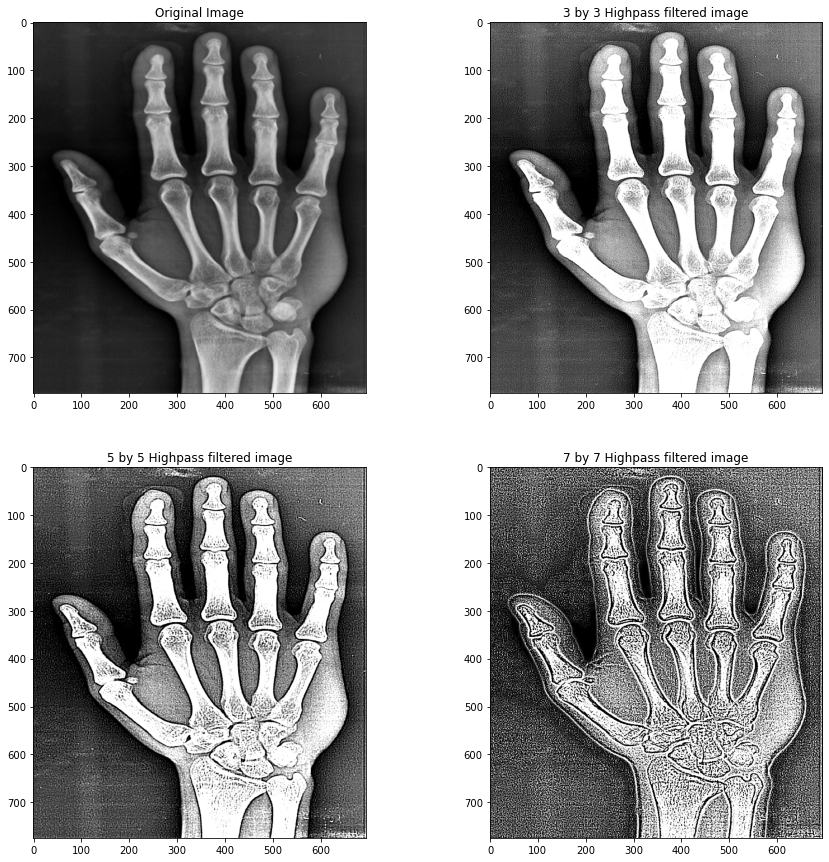

In [44]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(221), plt.imshow(Hand,cmap="gray"),plt.title("Original Image")
fig.add_subplot(222), plt.imshow(Hand_3by3,cmap="gray"),plt.title("3 by 3 Highpass filtered image")
fig.add_subplot(223), plt.imshow(Hand_5by5,cmap="gray"),plt.title("5 by 5 Highpass filtered image")
fig.add_subplot(224), plt.imshow(Hand_7by7,cmap='gray'),plt.title("7 by 7 Highpass filtered image");

# Observations:

**By applying Laplacian filter, I enhanced the fine details or edges in image. By increasing filter size, the   edges became much clearer and more connected. Finally, by modifying central element of used filters, the filtered image got boosted high by removing very small details.**

# Fourth Part

**The goal of this part is to implement sober operator in order to detect vertical, diagonal and horizontal edges in an image.**

# Sobel Operator

I have followed the below task for completing this part of the assignment:

**Step-1:** Image of interest were loaded to complte this task:

**Step-2:** Design Sobel filters kernel (Horizontal, Diagonal and Vertical) 

**Step-3:** Then performed Convolution of filters kernel with the image to get edges


In [45]:
Image=cv2.imread("Input1.jpg")
Image1=cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)


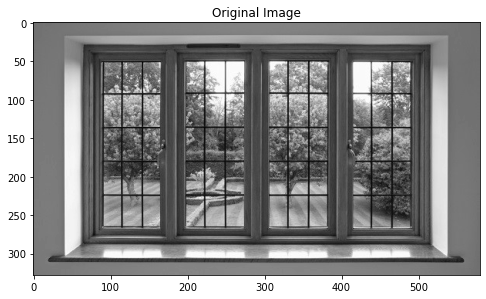

In [46]:
fig=plt.figure(figsize=(8,8))
fig.add_subplot(1,1,1),plt.imshow(Image1,cmap="gray"),plt.title("Original Image");

In [56]:
# Creating 3by3 kernel for horizontal Sobel edge
sobel_kernel_horizontal=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

# Creating 3by3 kernel for Vertical Sobel edge
sobel_kernel_Verical=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

# Creating 3by3 kernel for Diagonal Sobel edge
sobel_kernel_diagonal=np.array([[0,1,2], [-1,0,1], [-2,-1,0]])

In [57]:
# Designing of sobel filters
sobel_horizontal=cv2.filter2D(Image1,-1,sobel_kernel_horizontal)
sobel_Verical=cv2.filter2D(Image1,-1,sobel_kernel_Verical)
sobel_diagonal=cv2.filter2D(Image1,-1,sobel_kernel_diagonal)

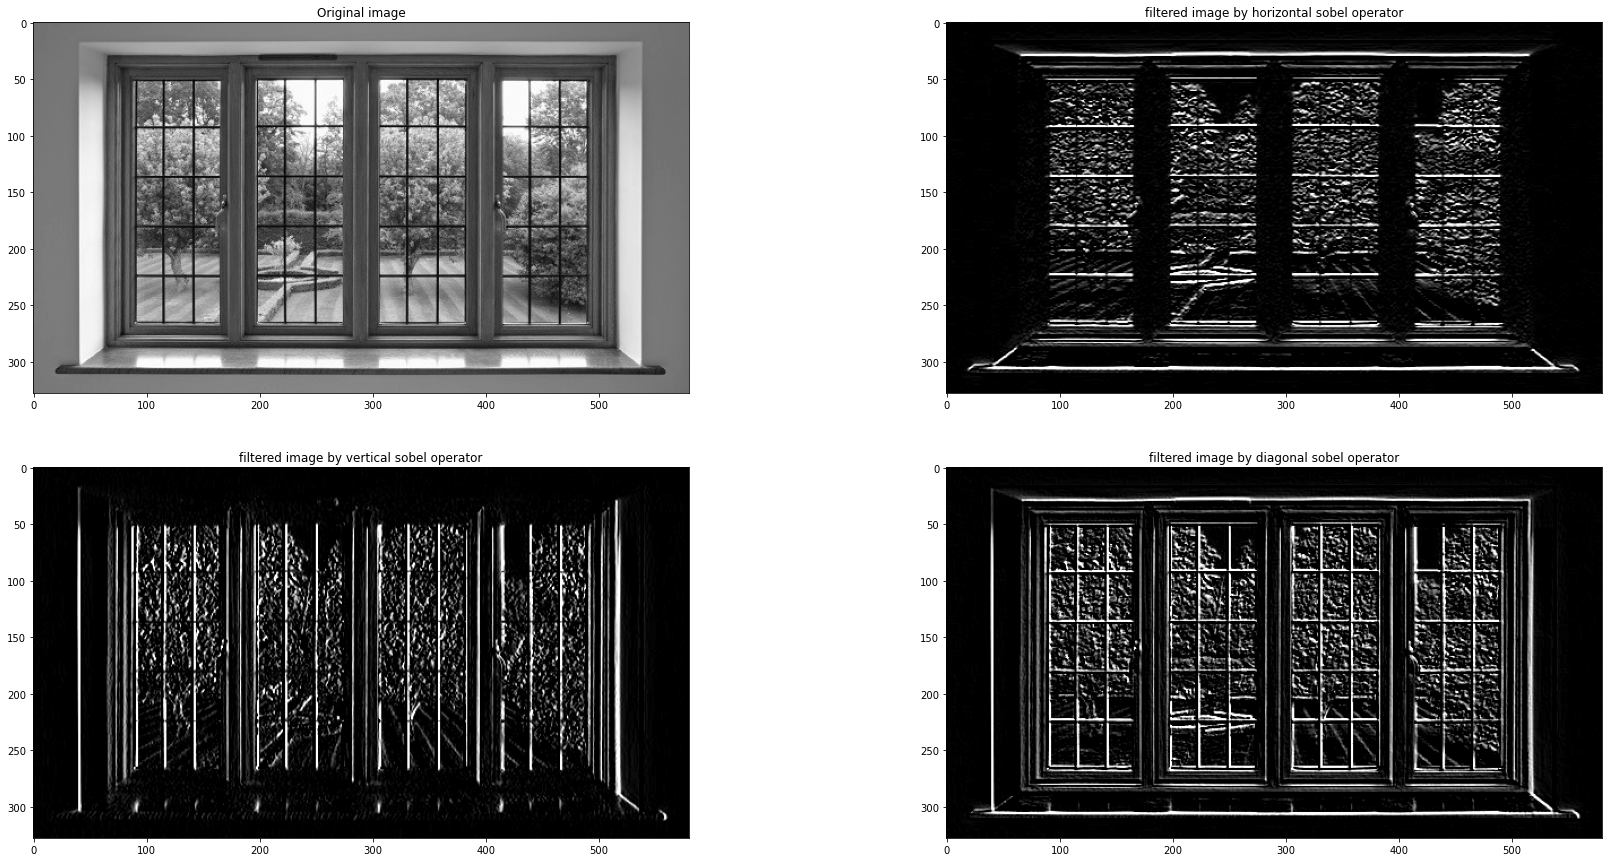

In [58]:
fig= plt.figure(figsize=(30,15))
fig.add_subplot(221),plt.imshow(Image1,cmap='gray'),plt.title("Original image")
fig.add_subplot(222),plt.imshow(sobel_horizontal,cmap='gray'),plt.title("filtered image by horizontal sobel operator")
fig.add_subplot(223),plt.imshow(sobel_Verical,cmap='gray'),plt.title("filtered image by vertical sobel operator")
fig.add_subplot(224),plt.imshow(sobel_diagonal,cmap='gray'),plt.title("filtered image by diagonal sobel operator");

# Observations:

**As we can see from the above results, we can see horizontal, diagonal and vertical edges of the window and outside of the window. This done by convolving sobel operators on the original image.**

# Fifth Part

#### I have done some task before getting your email. I have consulted with you for this part and I have done some task according to your direction.

# Automatic Mask Creation

**The target of this part is to enhance the image by combining images resulting from different filtering operations (Laplacian, Sobel, average, power-law) sequentially. I have done some of this and need to do a couple of tasks.**

In [96]:
Shepherd=cv2.imread('Shepered.png')
Shepherd=cv2.cvtColor(Shepherd, cv2.COLOR_BGR2GRAY)

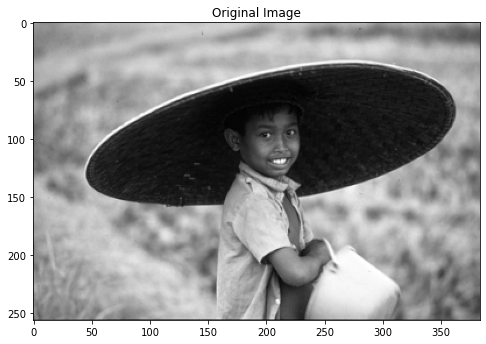

In [97]:
fig=plt.figure(figsize=(8,8))
fig.add_subplot(1,1,1),plt.imshow(Shepherd,cmap="gray"),plt.title("Original Image");

In [98]:
# Creating laplacian mask
Laplace_kernel=np.array([[1,0,0,1,0,0,1],
                          [0,2,0,2,0,2,0],
                          [0,0,4,4,4,0,0],
                          [1,2,4,-56,4,2,1],
                          [0,0,4,4,4,0,0],
                          [0,2,0,2,0,2,0],
                          [1,0,0,1,0,0,1]])
# Designing Laplacian filter
Shepherd_Laplace= cv2.filter2D(Shepherd,-1,Laplace_kernel)

In [101]:
kernel_horizontal=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
kernel_Verical=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_diagonal=np.array([[0,1,2], [-1,0,1], [-2,-1,0]])

# Designing sobel filter of an original Image
Shepherd_Sobel_horizontal=cv2.filter2D(Shepherd,-1,kernel_horizontal)


In [122]:
# Sharpened_Image=Original_Image - Blurred_Image
# Blurred_Image=Original_Image - Sharpened_Image
Blurred_Shepherd_Image=Shepherd- Shepherd_Sobel_horizontal
Blurred_Shepherd_Image=((Blurred_Shepherd_Image.min())/(Blurred_Shepherd_Image.max()-Blurred_Shepherd_Image.min()))*255
Blurred_Shepherd_Image=Blurred_Shepherd_Image.astype('uint8')

In [104]:
# Creating 5 by 5 kernel
mean_5by5_kernel=np.ones((5,5),np.float32)/25

# 5 by 5 dimesion filter
Shepherd_image_5by5=cv2.filter2D(Shepherd,-1,mean_5by5_kernel)

In [105]:
#Smoothing Horizontal sobeled image by mean/average filter
Smoothing_Shepherd_Image= Shepherd_image_5by5[Shepherd_Sobel_horizontal,5]

In [114]:
#Power law transformation
Shepherd_Power=255*(Shepherd)^8

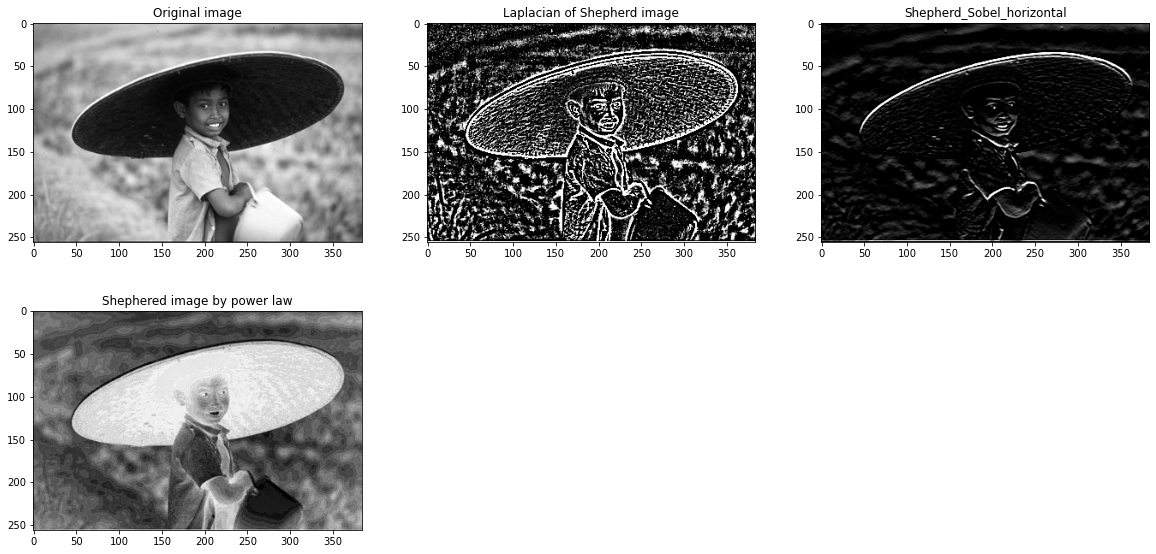

In [123]:
fig= plt.figure(figsize=(20,15))
fig.add_subplot(331),plt.imshow(Shepherd,cmap='gray'),plt.title("Original image")
fig.add_subplot(332),plt.imshow(Shepherd_Laplace,cmap='gray'),plt.title("Laplacian of Shepherd image")
fig.add_subplot(333),plt.imshow(Shepherd_Sobel_horizontal,cmap='gray'),plt.title("Shepherd_Sobel_horizontal");
fig.add_subplot(334),plt.imshow(Shepherd_Power,cmap='gray'),plt.title("Shephered image by power law");